In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1. Load the data from “glass.csv” and make a bar plot of different types of glasses

In [2]:
data = pd.read_csv("glass.csv")

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


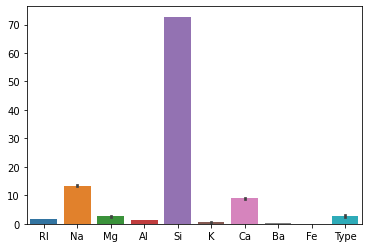

In [5]:
sns.barplot(data=data);

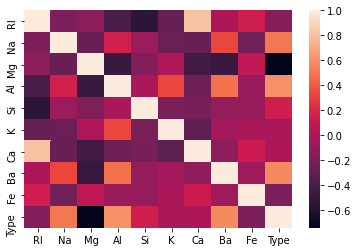

In [8]:
sns.heatmap(data.corr());

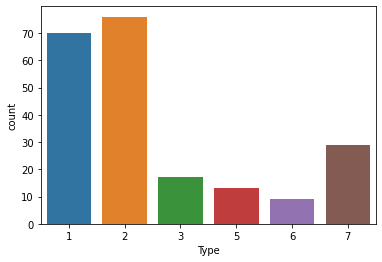

In [10]:
sns.countplot(data['Type']);

## 2. Make a train_test split and fit a single decision tree classifier

In [17]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=85, test_size=0.25)

In [21]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
y_pred = classifier.predict(X_test)

In [26]:
print("On overall data : ",accuracy_score(y_test, y_pred))

On overall data :  0.7222222222222222


## 3. Make a k-fold split with 3 splits and measure the accuracy score with each split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=85, test_size=0.25)

In [28]:
from sklearn.model_selection import cross_val_score

In [32]:
print(cross_val_score(classifier, X, y, cv=3, scoring='accuracy'))

[0.61111111 0.63380282 0.52112676]


In [33]:
print(cross_val_score(classifier, X, y, cv=3, scoring='accuracy').mean())

0.5652712571726657


## 4. Use gridSearchCV from sklearn for finding out a suitable number of estimators for a RandomForestClassifer along with a 10-fold cross validation

In [35]:
from sklearn.model_selection import KFold, ShuffleSplit, GridSearchCV

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [38]:
param_grid = {'n_estimators' : [100, 200], 'max_features': ['auto', 'sqrt', 'log2']}

In [39]:
n_estimator = GridSearchCV(estimator=classifier, param_grid=param_grid , cv=5)

In [40]:
n_estimator.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [41]:
print(n_estimator.best_params_)

{'max_features': 'auto', 'n_estimators': 200}


In [42]:
new_classifier = RandomForestClassifier(n_estimators=200)

In [45]:
print(cross_val_score(new_classifier, X, y, cv=10, scoring='accuracy'))

C:\Users\dhira\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[0.68181818 0.68181818 0.81818182 0.72727273 0.71428571 0.85714286
 0.9047619  0.52380952 0.80952381 0.71428571]


In [46]:
print(cross_val_score(new_classifier, X, y, cv=10, scoring='accuracy').mean())

C:\Users\dhira\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.7528138528138528
